<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> 2.- Variables Categóricas Ordinales </font> </center>

Las variables categóricas ordinales son aquellas cuyos valores representan categorías con un orden inherente, pero sin una distancia numérica definida entre ellas. Ejemplos comunes incluyen niveles educativos, clasificaciones de satisfacción, o tamaños (pequeño, mediano, grande).

# Codificación Ordinal Simple (Label Encoding)

Consiste en asignar un número entero a cada categoría, respetando el orden natural de la variable.

**Ejemplo:**

Supongamos la variable `Nivel de Educación` con las categorías:

- Primaria
- Secundaria
- Preparatoria
- Universidad

La codificación sería:

| Nivel de Educación | Codificación |
|-------------------|--------------|
| Primaria          | 1            |
| Secundaria        | 2            |
| Preparatoria      | 3            |
| Universidad       | 4            |

Esta técnica es sencilla y mantiene el orden, pero asume que la distancia entre categorías es igual, lo cual no siempre es cierto.

In [1]:
# Ejemplo de codificación ordinal simple en pandas
import pandas as pd

df = pd.DataFrame({
    'Nivel de Educación': ['Primaria', 'Secundaria', 'Universidad', 'Preparatoria', 'Secundaria']
})

In [2]:

orden = ['Primaria', 'Secundaria', 'Preparatoria', 'Universidad']
df['Nivel Codificado'] = df['Nivel de Educación'].apply(lambda x: orden.index(x) + 1)
df

,Nivel de Educación,Nivel Codificado
0,Primaria,1
1,Secundaria,2
2,Universidad,4
3,Preparatoria,3
4,Secundaria,2


# Contraste polinómico: relación polinomial entre categorías

In [3]:
import pandas as pd
import numpy as np
data=pd.read_csv('temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT
                                                         #         http://astro.iam.udg.mx/Estacion/NOAAMO.TXT
data.columns=['Temperatura máxima','Temperatura mínima','HDD','CDD','Rain']
d=['Sábado','Domingo','Lunes','Martes','Miércoles','Jueves','Viernes']
dias=[d[i%7] for i in range(len(data))]
catego=['Soleado','Mayormente soleado','Parcialmente nublado','Mayormente nublado','Nublado','Lluvioso']
prono=[catego[-1] if data['Rain'][i]>0 else catego[int(round(1.2*(data['HDD'][i]-data['CDD'][i])+2))] for i in range(len(data))]
df=pd.DataFrame(columns=['Días','Pronóstico','Temperatura máxima','Temperatura mínima'],index=range(len(data)))
df.iloc[:,2:4]=data.iloc[:,0:2]
df['Días']=dias
df['Pronóstico']=prono
df.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\uie70742\AppData\Local\Temp\ipykernel_19352\3425720357.py:3: SyntaxWarning: invalid escape sequence '\s'
  data=pd.read_csv('temps.txt',sep='\s+',header=None) # Fuente: http://astro.iam.udg.mx/Estacion/NOAAPRMO.TXT


,Días,Pronóstico,Temperatura máxima,Temperatura mínima
0,Sábado,Parcialmente nublado,28.2,11.2
1,Domingo,Parcialmente nublado,29.1,10.7
2,Lunes,Mayormente nublado,26.1,10.4
3,Martes,Mayormente soleado,29.4,11.1
4,Miércoles,Mayormente soleado,29.8,11.1


## Codificación lineal

- Encontrar $X =\{x_1,..,x_n\}$ donde $n$ el número de categorías

In [4]:
df['Días'].nunique()

7

In [6]:
#Codificación para la variable `Días`
n = df['Días'].nunique()
lim = n-1 if n%2 == 0 else (n-1)//2
step = 2 if n%2 == 0 else 1

x = range(-lim,lim+1, step)
x

range(-3, 4)

In [7]:
np.array(x)

array([-3, -2, -1,  0,  1,  2,  3])

In [9]:
list(x)

[-3, -2, -1, 0, 1, 2, 3]

In [11]:
catego = df['Días'].unique()
catego

array(['Sábado', 'Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes'], dtype=object)

In [12]:
#Ordenar las categorías
dias_ord = ['Lunes', 'Martes', 'Miércoles', 'Jueves',
       'Viernes', 'Sábado', 'Domingo']
dias_ord

['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']

In [13]:
#Definimos los valores de a0, a1
a0=0
a1=5
#Polinomio grado1
dias_lin = {categorias: a1*i + a0 for categorias,i in zip(dias_ord, x)}
dias_lin

{'Lunes': -15,
 'Martes': -10,
 'Miércoles': -5,
 'Jueves': 0,
 'Viernes': 5,
 'Sábado': 10,
 'Domingo': 15}

In [15]:
#Creamos una nueva columna con la transformación de `Dias`
df['Dias_lin'] = df['Días'].map(dias_lin)
df

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Dias_lin
0,Sábado,Parcialmente nublado,28.2,11.2,10
1,Domingo,Parcialmente nublado,29.1,10.7,15
2,Lunes,Mayormente nublado,26.1,10.4,-15
3,Martes,Mayormente soleado,29.4,11.1,-10
4,Miércoles,Mayormente soleado,29.8,11.1,-5
5,Jueves,Mayormente soleado,30.2,10.2,0
6,Viernes,Mayormente soleado,29.3,10.3,5
7,Sábado,Mayormente soleado,28.6,10.9,10
8,Domingo,Parcialmente nublado,29.0,9.8,15
9,Lunes,Mayormente soleado,27.2,11.2,-15


In [16]:
#Codificando la variable `Pronóstico`
n = df['Pronóstico'].nunique()
lim = n-1 if n%2 == 0 else (n-1)//2
step = 2 if n%2 == 0 else 1

x = range(-lim,lim+1, step)
list(x)

[-5, -3, -1, 1, 3, 5]

In [17]:
n

6

In [18]:
df['Pronóstico'].unique()

array(['Parcialmente nublado', 'Mayormente nublado', 'Mayormente soleado',
       'Soleado', 'Lluvioso', 'Nublado'], dtype=object)

In [19]:
pronostico_ord = ['Soleado', 'Mayormente soleado', 'Parcialmente nublado', 'Nublado',  'Mayormente nublado', 'Lluvioso']
pronostico_ord

['Soleado',
 'Mayormente soleado',
 'Parcialmente nublado',
 'Nublado',
 'Mayormente nublado',
 'Lluvioso']

In [21]:
#Asignamos los valores de a0, a1
a0=0
a1 = -1
#Realizamos la transformación
pronostico_lin = {categorias: a1*i + a0 for categorias,i in zip(pronostico_ord, x)}
pronostico_lin

{'Soleado': 5,
 'Mayormente soleado': 3,
 'Parcialmente nublado': 1,
 'Nublado': -1,
 'Mayormente nublado': -3,
 'Lluvioso': -5}

In [22]:
#Creamos una nueva columna `Pronóstico_lin`
df['Pronostico_lin'] = df['Pronóstico'].map(pronostico_lin)
df

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Dias_lin,Pronostico_lin
0,Sábado,Parcialmente nublado,28.2,11.2,10,1
1,Domingo,Parcialmente nublado,29.1,10.7,15,1
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3
3,Martes,Mayormente soleado,29.4,11.1,-10,3
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3
5,Jueves,Mayormente soleado,30.2,10.2,0,3
6,Viernes,Mayormente soleado,29.3,10.3,5,3
7,Sábado,Mayormente soleado,28.6,10.9,10,3
8,Domingo,Parcialmente nublado,29.0,9.8,15,1
9,Lunes,Mayormente soleado,27.2,11.2,-15,3


## Codificación cuadrática

In [ ]:
x = range(-lim,lim+1, step)
list(x)

In [29]:
#Codificación de la variable `Pronóstico` cuadrática
a2=-1
a1=0
a0=(-a2/n)*(np.sum([i**2 for i in x]))


a0,a1,a2

(11.666666666666666, 0, -1)

In [30]:
Pronostico_cuad= {categorias: a0 + a1*i + a2*i**2 for categorias,i in zip(pronostico_ord, x)}
Pronostico_cuad

{'Soleado': -13.333333333333334,
 'Mayormente soleado': 2.666666666666666,
 'Parcialmente nublado': 10.666666666666666,
 'Nublado': 10.666666666666666,
 'Mayormente nublado': 2.666666666666666,
 'Lluvioso': -13.333333333333334}

In [27]:
#sus coeficientes deben de sumar cero
np.sum(list(pronostico_lin.values()))

0

In [31]:
df['Pronostico_cuad'] = df['Pronóstico'].map(Pronostico_cuad)
df

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Dias_lin,Pronostico_lin,Pronostico_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,10,1,10.666667
1,Domingo,Parcialmente nublado,29.1,10.7,15,1,10.666667
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3,2.666667
3,Martes,Mayormente soleado,29.4,11.1,-10,3,2.666667
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3,2.666667
5,Jueves,Mayormente soleado,30.2,10.2,0,3,2.666667
6,Viernes,Mayormente soleado,29.3,10.3,5,3,2.666667
7,Sábado,Mayormente soleado,28.6,10.9,10,3,2.666667
8,Domingo,Parcialmente nublado,29.0,9.8,15,1,10.666667
9,Lunes,Mayormente soleado,27.2,11.2,-15,3,2.666667


In [39]:
#Codificación de `Días` cuadrática
n = df['Días'].nunique()
lim = n-1 if n%2 == 0 else (n-1)//2
step = 2 if n%2 == 0 else 1

x = range(-lim,lim+1, step)

a2=1
a1=0
a0=(-a2/n)*(np.sum([i**2 for i in x]))
a0,a1,a2

(-4.0, 0, 1)

In [40]:
dias_cuad = {categorias: a0 + a1*i + a2*i**2 for categorias,i in zip(dias_ord, x)}
dias_cuad

{'Lunes': 5.0,
 'Martes': 0.0,
 'Miércoles': -3.0,
 'Jueves': -4.0,
 'Viernes': -3.0,
 'Sábado': 0.0,
 'Domingo': 5.0}

In [ ]:
def cod_cuad(var_cat, polinomio=1):
    

In [41]:
df['Dias_cuad'] = df['Días'].map(dias_cuad)
df

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Dias_lin,Pronostico_lin,Pronostico_cuad,Dias_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,10,1,10.666667,0.0
1,Domingo,Parcialmente nublado,29.1,10.7,15,1,10.666667,5.0
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3,2.666667,5.0
3,Martes,Mayormente soleado,29.4,11.1,-10,3,2.666667,0.0
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3,2.666667,-3.0
5,Jueves,Mayormente soleado,30.2,10.2,0,3,2.666667,-4.0
6,Viernes,Mayormente soleado,29.3,10.3,5,3,2.666667,-3.0
7,Sábado,Mayormente soleado,28.6,10.9,10,3,2.666667,0.0
8,Domingo,Parcialmente nublado,29.0,9.8,15,1,10.666667,5.0
9,Lunes,Mayormente soleado,27.2,11.2,-15,3,2.666667,5.0


## Regresión lineal

Aplicamos modelos de regresión lineal para las variables transformadas

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
import matplotlib.pyplot as plt

In [46]:
pronostico_lin

{'Soleado': 5,
 'Mayormente soleado': 3,
 'Parcialmente nublado': 1,
 'Nublado': -1,
 'Mayormente nublado': -3,
 'Lluvioso': -5}

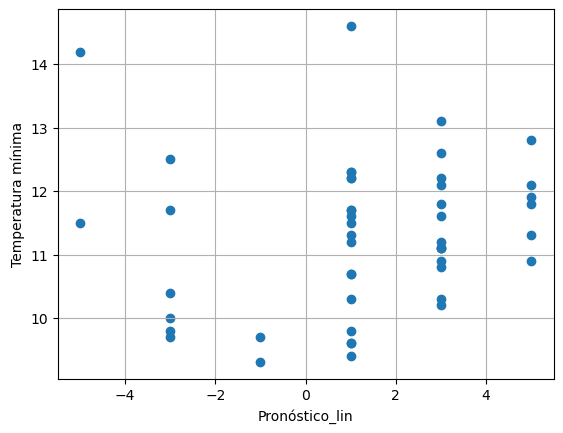

In [48]:
plt.scatter(df['Pronostico_lin'],df['Temperatura mínima'])
plt.xlabel('Pronóstico_lin')
plt.ylabel('Temperatura mínima')
plt.grid()

In [49]:
Pronostico_cuad

{'Soleado': -13.333333333333334,
 'Mayormente soleado': 2.666666666666666,
 'Parcialmente nublado': 10.666666666666666,
 'Nublado': 10.666666666666666,
 'Mayormente nublado': 2.666666666666666,
 'Lluvioso': -13.333333333333334}

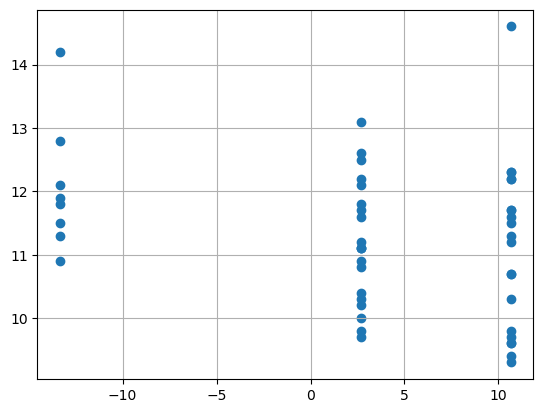

In [50]:
plt.scatter(df['Pronostico_cuad'],df['Temperatura mínima'])
plt.grid()

In [51]:
df

,Días,Pronóstico,Temperatura máxima,Temperatura mínima,Dias_lin,Pronostico_lin,Pronostico_cuad,Dias_cuad
0,Sábado,Parcialmente nublado,28.2,11.2,10,1,10.666667,0.0
1,Domingo,Parcialmente nublado,29.1,10.7,15,1,10.666667,5.0
2,Lunes,Mayormente nublado,26.1,10.4,-15,-3,2.666667,5.0
3,Martes,Mayormente soleado,29.4,11.1,-10,3,2.666667,0.0
4,Miércoles,Mayormente soleado,29.8,11.1,-5,3,2.666667,-3.0
5,Jueves,Mayormente soleado,30.2,10.2,0,3,2.666667,-4.0
6,Viernes,Mayormente soleado,29.3,10.3,5,3,2.666667,-3.0
7,Sábado,Mayormente soleado,28.6,10.9,10,3,2.666667,0.0
8,Domingo,Parcialmente nublado,29.0,9.8,15,1,10.666667,5.0
9,Lunes,Mayormente soleado,27.2,11.2,-15,3,2.666667,5.0


In [53]:
lin=LinearRegression()
lin.fit(df[['Pronostico_lin','Pronostico_cuad']],df['Temperatura mínima'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


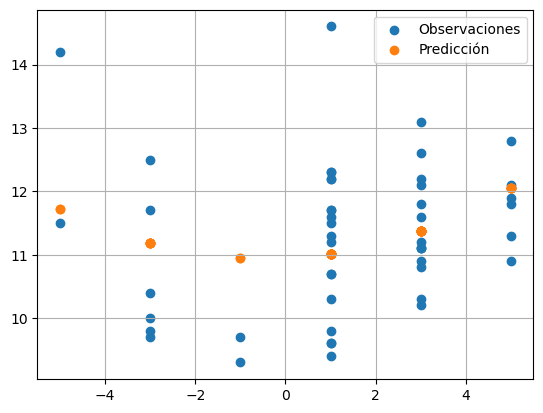

In [55]:
#Grafica de la predicción
f=lin.predict(df[['Pronostico_lin','Pronostico_cuad']])
plt.scatter(df['Pronostico_lin'],df['Temperatura mínima'],label='Observaciones')
plt.scatter(df['Pronostico_lin'],f,label='Predicción')
plt.legend()
plt.grid()

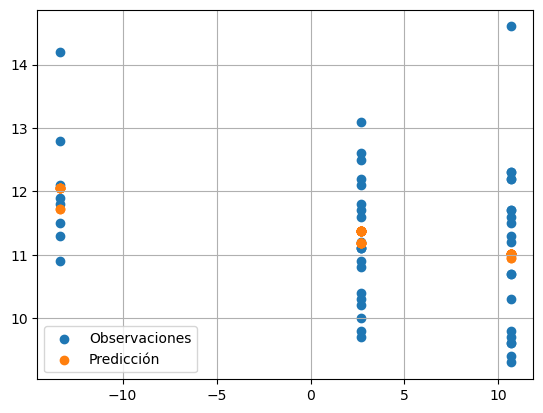

In [56]:
plt.scatter(df['Pronostico_cuad'],df['Temperatura mínima'],label='Observaciones')
plt.scatter(df['Pronostico_cuad'],f,label='Predicción')
plt.legend()
plt.grid()